This code computes the energy splitting of the harmonic oscillator, using 100 bootstrap copies of the original configurations. Running the cell below will compute the two point correlator for the harmonic oscillator. The correlator data is stored in a 2D array $G^\alpha(t)$ where alpha is the configuration and $t$ is the time extent

In [ ]:
#In this code, we are using an improved action by changing the integration variable which leads to an improved potential term 
import numpy as np
import matplotlib.pyplot as plt

N = 20
eps = 1.4
N_cor = 20
N_cf = 1000
Nbstrap = 100
a = 0.5
x = np.zeros(N)
G = np.zeros((N_cf,N))
errorbars = np.zeros(N-1)

def update(x):
    for j in range(0,N):        
        old_x = x[j]    # save original value    
        old_Sj = S(j,x)
        x[j] = x[j] + np.random.uniform(-eps,eps)   # update x[j]
        dS = S(j,x) - old_Sj                        # change in action
        if dS > 0 and np.exp(-dS) < np.random.uniform(0,1):
            x[j] = old_x  # restore old value  

def S(j,x):                                         # harmonic oscillator action with improved potential 
    jp = (j+1)%N
    jm = (j-1)%N
    return a*x[j]**2/2*(1+a**2/12)+x[j]*(x[j]-x[jp]-x[jm])/a

def compute_G(x,n):
    g = 0
    for j in range (0,N):
        g = g+x[j]*x[(j+n)%N]
    return g/N

def MCaverage(x,G):
    for j in range (0,N):   # initialize x
        x[j] = 0
    for j in range (0,5*N_cor): # thermalize x
        update(x)
    for alpha in range (0,N_cf):    # loop on random paths 
        for j in range (0,N_cor):
            update(x)
        for n in range(0,N):
           G[alpha][n] = compute_G(x,n)
    for n in range (0,N): #compute MC averages
        avg_G = 0
        for alpha in range(0,N_cf):
            avg_G = avg_G + G[alpha][n]
        avg_G = avg_G/N_cf
        print("G(%d) = %g" % (n,avg_G))
    
MCaverage(x,G)



Here is where I define my bootstrap function. See if you can code up a jacknife function also. 

In [ ]:
def bootstrap(G):
    N_cf = len(G)
    G_bootstrap = []    # new ensemble
    for i in range(0,N_cf):
        alpha = np.random.randint(0,N_cf)   # choose random config
        G_bootstrap.append(G[alpha])    # keep G[alpha]
    return G_bootstrap 

Here I have defined the binning function but I have not implemented it yet. Try binning the correlator before doing the bootstrapping

In [ ]:
def bin(G,binsize): #binning the G's
    G_binned = np.zeros((int(len(G)/binsize), N)) #matrix G binned in alphas
    k=0
    for i in range(0,len(G),binsize): #binning the G
        G_avg = 0
        for j in range(binsize): #summing for each bin
            G_avg = G_avg + G[i+j]
        G_binned[k]=(G_avg/binsize) #bin average
        k+=1
    return G_binned


You can use this cell to compute the energy. Try plotting the energy splittings obtained from the correlator from the theoretical value of $\Delta E$ = 1.

Plotting

This is an example output with a binsize of 20.

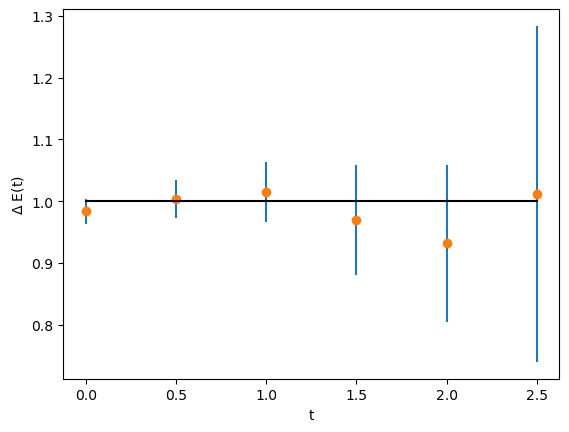